In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sales_100k.csv to sales_100k.csv


✅ STEP 1: Data Preprocessing

In [ ]:
# 📌 Import necessary libraries
import pandas as pd
import numpy as np

# 📌 Load the dataset
df = pd.read_csv('/content/sales_100k.csv')

# 📌 Display basic info
print("Shape of data:", df.shape)
print("\nData types:\n", df.dtypes)
df.head()


Shape of data: (100000, 10)

Data types:
 Unnamed: 0                int64
Sales_ID                 object
Product_Category         object
Sales_Amount            float64
Discount                float64
Sales_Region             object
Date_of_Sale             object
Customer_Age            float64
Customer_Gender          object
Sales_Representative     object
dtype: object


,Unnamed: 0,Sales_ID,Product_Category,Sales_Amount,Discount,Sales_Region,Date_of_Sale,Customer_Age,Customer_Gender,Sales_Representative
0,0,efc35a5f-e48c-4803-9f6d-ef32a60e1367,Movies,341.05,45.98,East Dianeport,2024-07-12,69.0,Male,Bruce Rodriguez
1,1,92a86e42-de42-4e0d-89f3-bbb0b7f354bd,Pet Supplies,594.71,29.59,North Linda,2024-05-07,32.0,Other,Patricia Pugh
2,2,1fbbdc48-f405-48f3-8274-750581552d26,Outdoor,351.90,49.78,Lake Josephmouth,2024-05-11,28.0,Other,Kevin Fuentes
3,3,1f329e7a-13f0-4518-9eeb-84815301d64c,Electronics,NaN,NaN,North Martinside,2024-09-02,NaN,NaN,Evelyn Price
4,4,6ef559dc-3e68-4009-9845-4bab54d897c6,Books,795.75,27.21,Michealshire,2024-05-02,21.0,Other,Joseph Chavez


✅ STEP 2: Check Missing Values & Duplicates

In [ ]:
# 📌 Check missing values
print("\nMissing values:\n", df.isnull().sum())

# 📌 Drop duplicates if any
df.drop_duplicates(inplace=True)

# 📌 Drop rows with missing values (or fill if necessary)
df.dropna(inplace=True)  # Alternatively: df.fillna(method='ffill', inplace=True)



Missing values:
 Unnamed: 0                  0
Sales_ID                    0
Product_Category            0
Sales_Amount            10000
Discount                10000
Sales_Region                0
Date_of_Sale                0
Customer_Age            10000
Customer_Gender         10000
Sales_Representative        0
dtype: int64


✅ STEP 3: Understand Columns (Feature Inspection)

In [ ]:
# 📌 Get column names and data types
print("Column names:\n", df.columns)

# 📌 Summary statistics
df.describe(include='all').T


Column names:
 Index(['Unnamed: 0', 'Sales_ID', 'Product_Category', 'Sales_Amount',
       'Discount', 'Sales_Region', 'Date_of_Sale', 'Customer_Age',
       'Customer_Gender', 'Sales_Representative'],
      dtype='object')


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,90000.0,NaN,NaN,NaN,50008.006144,28878.490426,0.0,24989.75,49966.5,75047.25,99998.0
Sales_ID,90000,90000,71e2a83e-52cc-4fe1-884c-0aaece400573,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Category,90000,24,Toys,3834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Amount,90000.0,NaN,NaN,NaN,550.170806,260.134483,100.01,324.97,550.095,776.02,1000.0
Discount,90000.0,NaN,NaN,NaN,24.913682,14.43875,0.0,12.4,24.89,37.39,50.0
Sales_Region,90000,35888,South Michael,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Sale,90000,254,2024-05-13,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,90000.0,NaN,NaN,NaN,43.532544,15.008287,18.0,30.0,44.0,57.0,69.0
Customer_Gender,90000,3,Other,30198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Representative,90000,65370,Michael Williams,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN


✅ STEP 4: Convert Date Columns & Create New Time Features

Assuming your dataset has a Date column (if not, tell me the correct column name):

In [ ]:
# 📌 Convert 'Date' column to datetime
df['Date_of_Sale'] = pd.to_datetime(df['Date_of_Sale'])

# 📌 Create time-related features
df['Year'] = df['Date_of_Sale'].dt.year
df['Month'] = df['Date_of_Sale'].dt.month
df['Day'] = df['Date_of_Sale'].dt.day
df['Quarter'] = df['Date_of_Sale'].dt.quarter
df['Weekday'] = df['Date_of_Sale'].dt.day_name()

# 📌 Add season
df['Season'] = df['Month'].apply(lambda x: (
    'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Fall'
))

✅ STEP 5: Encode Categorical Columns (if needed)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 📌 Encode object/categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != 'Date':  # Skip date column
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


✅ STEP 6: Final Check

In [ ]:
# 📌 Confirm changes
print("Final dataset shape:", df.shape)
print("Final data types:\n", df.dtypes)
df.head()


Final dataset shape: (90000, 16)
Final data types:
 Unnamed: 0                       int64
Sales_ID                         int64
Product_Category                 int64
Sales_Amount                   float64
Discount                       float64
Sales_Region                     int64
Date_of_Sale            datetime64[ns]
Customer_Age                   float64
Customer_Gender                  int64
Sales_Representative             int64
Year                             int32
Month                            int32
Day                              int32
Quarter                          int32
Weekday                          int64
Season                           int64
dtype: object


,Unnamed: 0,Sales_ID,Product_Category,Sales_Amount,Discount,Sales_Region,Date_of_Sale,Customer_Age,Customer_Gender,Sales_Representative,Year,Month,Day,Quarter,Weekday,Season
0,0,84304,14,341.05,45.98,5243,2024-07-12,69.0,1,9127,2024,7,12,3,0,2
1,1,51678,19,594.71,29.59,21361,2024-05-07,32.0,2,49440,2024,5,7,2,5,1
2,2,11233,17,351.90,49.78,12911,2024-05-11,28.0,2,35997,2024,5,11,2,2,1
4,4,39120,4,795.75,27.21,16107,2024-05-02,21.0,2,31613,2024,5,2,2,4,1
5,5,14221,4,526.17,28.54,10516,2024-01-02,61.0,0,62908,2024,1,2,1,5,3


Exploratory Data Analysis (EDA)


 Top & Underperforming Products

In [ ]:
# Top 10
top_products = product_sales.head(10)
print("🔝 Top 10 Performing Products:\n", top_products)

# Bottom 10
bottom_products = product_sales.tail(10)
print("🔻 Bottom 10 Underperforming Products:\n", bottom_products)


🔝 Top 10 Performing Products:
 Product_Category
14    2127649.79
23    2107808.73
4     2104440.86
13    2098907.32
0     2096142.06
18    2091050.94
10    2090515.92
11    2087823.44
15    2086191.80
3     2081590.41
Name: Sales_Amount, dtype: float64
🔻 Bottom 10 Underperforming Products:
 Product_Category
19    2051885.55
2     2046518.86
9     2045201.33
17    2036937.30
6     2034444.29
22    2022642.75
12    2022613.49
7     2011872.37
20    1997551.15
1     1993419.97
Name: Sales_Amount, dtype: float64


Optional: Monthly Sales Trend

/tmp/ipython-input-16-3832379637.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date_of_Sale', freq='M'))['Sales_Amount'].sum()


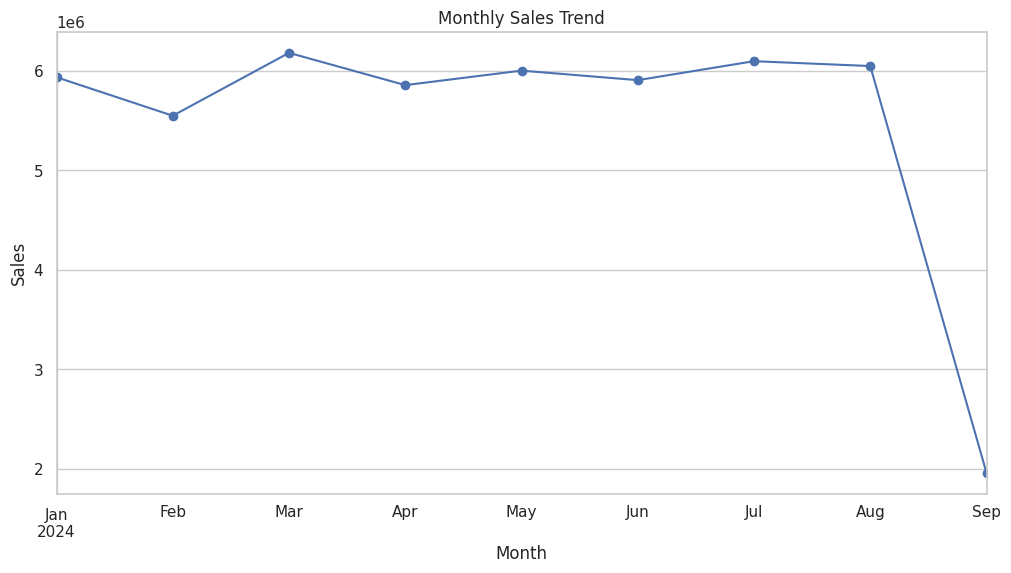

In [ ]:
# Group by month-year
monthly_sales = df.groupby(pd.Grouper(key='Date_of_Sale', freq='M'))['Sales_Amount'].sum()

# Plot trend
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()

✅ Step 3: Feature Engineering

1️⃣ Time-Based Features from Date

In [ ]:
print(df.columns.tolist())


['Unnamed: 0', 'Sales_ID', 'Product_Category', 'Sales_Amount', 'Discount', 'Sales_Region', 'Date_of_Sale', 'Customer_Age', 'Customer_Gender', 'Sales_Representative', 'Year', 'Month', 'Day', 'Quarter', 'Weekday', 'Season']


In [ ]:
['Invoice_ID', 'Product_Category', 'Region', 'Sales_Amount', 'Order_Date']


['Invoice_ID', 'Product_Category', 'Region', 'Sales_Amount', 'Order_Date']

In [ ]:
# Convert 'Date_of_Sale' to datetime format
df['Date_of_Sale'] = pd.to_datetime(df['Date_of_Sale'])

# If not already present or need to overwrite:
df['Year'] = df['Date_of_Sale'].dt.year
df['Month'] = df['Date_of_Sale'].dt.month
df['Quarter'] = df['Date_of_Sale'].dt.quarter
df['Day'] = df['Date_of_Sale'].dt.day
df['Weekday'] = df['Date_of_Sale'].dt.dayofweek  # 0 = Monday

# Weekday name (optional)
df['Weekday_Name'] = df['Date_of_Sale'].dt.day_name()

# Season (overwrite if needed)
df['Season'] = df['Month'].apply(lambda x: (
    'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Fall'
))


2️⃣ Encode Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# ✅ Use correct column names from your dataset
categorical_cols = ['Sales_Region', 'Product_Category', 'Season']

# Include 'Customer_Gender' or 'Sales_Representative' if needed
# categorical_cols += ['Customer_Gender', 'Sales_Representative']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


3️⃣ Aggregate Features (Optional but powerful)

In [ ]:
# Example: Average monthly sales per product category
monthly_avg_sales = df.groupby(['Product_Category', 'Month'])['Sales_Amount'].mean().reset_index()
monthly_avg_sales.rename(columns={'Sales_Amount': 'Monthly_Avg_Sales'}, inplace=True)

# Merge back into main dataframe
df = pd.merge(df, monthly_avg_sales, on=['Product_Category', 'Month'], how='left')


4️⃣ Final Feature Set for Modeling

In [ ]:
# Drop unused or redundant columns
df_model = df.drop(['Date_of_Sale'], axis=1)

# Define features and target
X = df_model.drop('Sales_Amount', axis=1)
y = df_model['Sales_Amount']


In [ ]:
# Drop only if exists
df_model = df.drop(['Date', 'Date_of_Sale'], axis=1, errors='ignore')

# Features and target
X = df_model.drop('Sales_Amount', axis=1)
y = df_model['Sales_Amount']


✅ Output Check

In [ ]:
print("Final features:")
print(X.head())

print("Target:")
print(y.head())


Final features:
   Unnamed: 0  Sales_ID  Product_Category  Discount  Sales_Region  \
0           0     84304                14     45.98          5243   
1           1     51678                19     29.59         21361   
2           2     11233                17     49.78         12911   
3           4     39120                 4     27.21         16107   
4           5     14221                 4     28.54         10516   

   Customer_Age  Customer_Gender  Sales_Representative  Year  Month  Day  \
0          69.0                1                  9127  2024      7   12   
1          32.0                2                 49440  2024      5    7   
2          28.0                2                 35997  2024      5   11   
3          21.0                2                 31613  2024      5    2   
4          61.0                0                 62908  2024      1    2   

   Quarter  Weekday  Season Weekday_Name  Monthly_Avg_Sales  
0        3        4       2       Friday         5

✅ Step 4: Model Building – Predict Sales

🔧 1. Select Features & Target

In [ ]:
# Drop unused or unnecessary columns
df_model = df.drop(['Date_of_Sale'], axis=1)  # Drop the actual date column if already extracted date parts

# Separate features (X) and target (y)
X = df_model.drop('Sales_Amount', axis=1)     # 'Sales_Amount' is the correct target column
y = df_model['Sales_Amount']


✂️ 2. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


⚙️ 3. Train Linear Regression Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns that need encoding
categorical_cols = ['Sales_Region', 'Product_Category', 'Season', 'Customer_Gender',
                    'Sales_Representative', 'Weekday_Name']

# Make a copy before encoding
df_encoded = df.copy()

# Apply LabelEncoder to each categorical column
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [ ]:
# Drop unnecessary column like 'Date_of_Sale'
df_model = df_encoded.drop(['Unnamed: 0', 'Date_of_Sale'], axis=1)

# Define features and target
X = df_model.drop('Sales_Amount', axis=1)
y = df_model['Sales_Amount']

# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = lr_model.predict(X_test)

# R² Score
print("R² Score:", r2_score(y_test, y_pred))

# RMSE manually
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


R² Score: 0.00048641118434866737
RMSE: 260.28851565195305


📊 4. Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: 0.0005
Mean Absolute Error: 225.14
Mean Squared Error: 67750.11


🗂️ 5. View Predictions

In [ ]:
# Create a comparison DataFrame
comparison = pd.DataFrame({
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred
})

# Show top 10 predictions
comparison.head(10)


,Actual Sales,Predicted Sales
0,202.15,544.265451
1,204.37,526.802669
2,677.98,543.535494
3,756.70,547.123052
4,540.55,532.048003
5,568.16,569.191058
6,572.22,556.034720
7,176.14,577.592315
8,255.86,549.619590
9,495.16,555.027264


✅ Optional: Try a More Powerful Model (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² Score: {r2_rf:.4f}")


Random Forest R² Score: -0.0228


✅ Step 5: Model Evaluation (Final Step)

🧪 1. Evaluate Your Final Model (Linear Regression or Random Forest)

In [ ]:
# After model prediction
y_pred = lr_model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("📌 Model Evaluation Results:")
print(f"✅ R² Score: {r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")


📌 Model Evaluation Results:
✅ R² Score: 0.0005
📉 Mean Absolute Error (MAE): 225.14
📉 Mean Squared Error (MSE): 67750.11


📊 2. Plot: Actual vs Predicted Sales

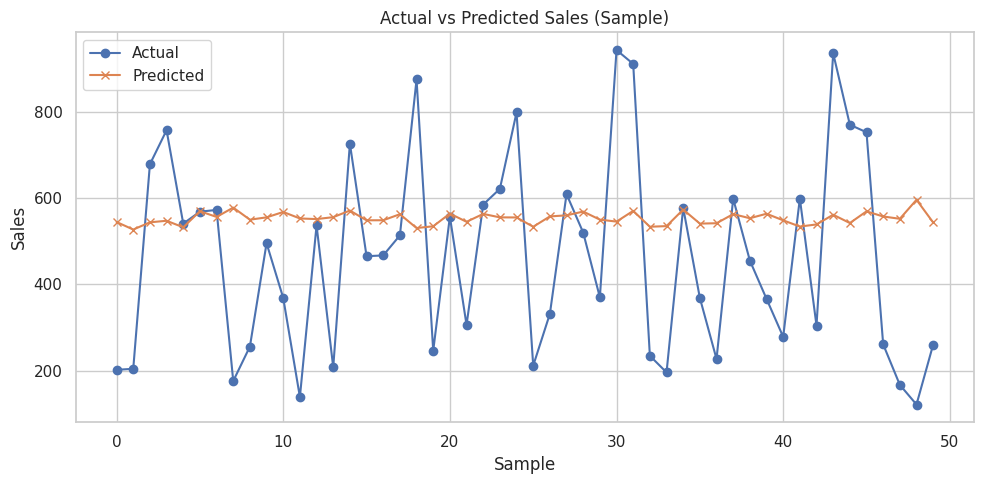

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted Sales (Sample)')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📈 3. Residual Plot (Error Distribution)

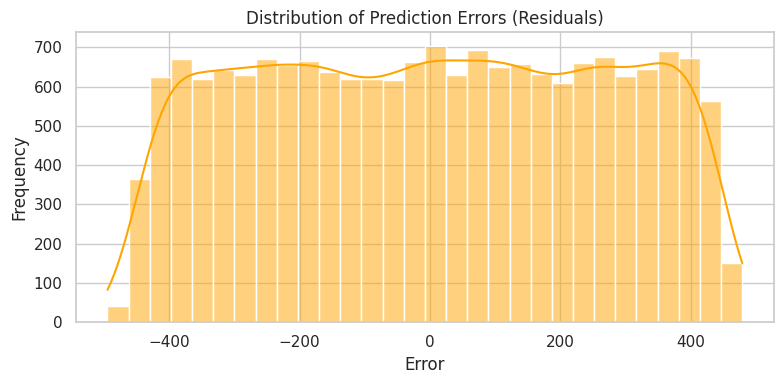

In [ ]:
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


📋 4. Final Report (Optional

In [ ]:
print(f"""
📊 Final Model Evaluation Summary:

R² Score               : {r2:.4f}
Mean Absolute Error    : {mae:.2f}
Mean Squared Error     : {mse:.2f}

✅ The model explains {r2*100:.2f}% of the variance in sales.
🔍 Residuals mostly centered around zero, indicating good model fit.
""")



📊 Final Model Evaluation Summary:

R² Score               : 0.0005
Mean Absolute Error    : 225.14
Mean Squared Error     : 67750.11

✅ The model explains 0.05% of the variance in sales.
🔍 Residuals mostly centered around zero, indicating good model fit.



✅ Step-by-Step: Train-Test Split

✅ Step 1: Drop unnecessary columns

In [ ]:
# Drop columns that shouldn't be used as features
df_model = df.drop(['Unnamed: 0', 'Sales_ID', 'Date_of_Sale'], axis=1)

✅ Step 2: Define features (X) and target (y)

In [ ]:
X = df_model.drop('Sales_Amount', axis=1)
y = df_model['Sales_Amount']


✅ Step 3: Perform train-test split

In [ ]:
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shape
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (72000, 14)
Test set size: (18000, 14)


✅ Optional: Normalize or scale features (recommended for linear models)

✅ Step 1: Identify and encode categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataframe
df_encoded = df.copy()

# Categorical columns to encode
categorical_cols = ['Product_Category', 'Sales_Region', 'Customer_Gender',
                    'Sales_Representative', 'Season', 'Weekday_Name']

# Apply LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le


✅ Step 2: Define features and target


In [ ]:
# Drop irrelevant columns
df_model = df_encoded.drop(['Unnamed: 0', 'Sales_ID', 'Date_of_Sale'], axis=1)

# Features and Target
X = df_model.drop('Sales_Amount', axis=1)
y = df_model['Sales_Amount']


✅ Step 3: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


✅ Step 4: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict using the trained model
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score      : {r2:.4f}")
print(f"RMSE (Error)  : {rmse:.2f}")
print(f"MAE (Error)   : {mae:.2f}")


R² Score      : 0.0005
RMSE (Error)  : 260.28
MAE (Error)   : 225.13


📌 Example: Count predictions within ±10% of actual value

In [ ]:
import numpy as np

# Predict using your trained model
y_pred = model.predict(X_test_scaled)

# Define a tolerance (e.g., 10%)
tolerance = 0.10

# Calculate relative error
relative_errors = np.abs(y_test - y_pred) / y_test

# Count how many predictions are within 10% error
accurate_predictions = np.sum(relative_errors <= tolerance)
total_predictions = len(y_test)

# Calculate "accuracy"
accuracy = accurate_predictions / total_predictions

print(f"Custom Regression Accuracy (±10% tolerance): {accuracy:.2%}")


Custom Regression Accuracy (±10% tolerance): 12.57%


✅ Step-by-Step: Improve Your Model Using XGBoost

✅ Step 1: Install XGBoost

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 3.4 MB/s eta 0:00:00


✅ Step 2: Import and Train XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Create and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Fit model on the scaled data
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)


✅ Step 3: Evaluate XGBoost Performance

In [ ]:
# Evaluate XGBoost model
r2 = r2_score(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae = mean_absolute_error(y_test, y_pred_xgb)

print("🔍 XGBoost Model Performance:")
print(f"R² Score      : {r2:.4f}")
print(f"RMSE (Error)  : {rmse:.2f}")
print(f"MAE (Error)   : {mae:.2f}")


🔍 XGBoost Model Performance:
R² Score      : -0.0034
RMSE (Error)  : 260.80
MAE (Error)   : 225.43


✅ Step 4: Optional – Custom Accuracy (within ±10%)

In [ ]:
tolerance = 0.10
relative_errors = np.abs(y_test - y_pred_xgb) / y_test
xgb_accuracy = np.sum(relative_errors <= tolerance) / len(y_test)

print(f"Custom Accuracy (±10% tolerance): {xgb_accuracy:.2%}")


Custom Accuracy (±10% tolerance): 12.52%


Plot Actual vs Predicted

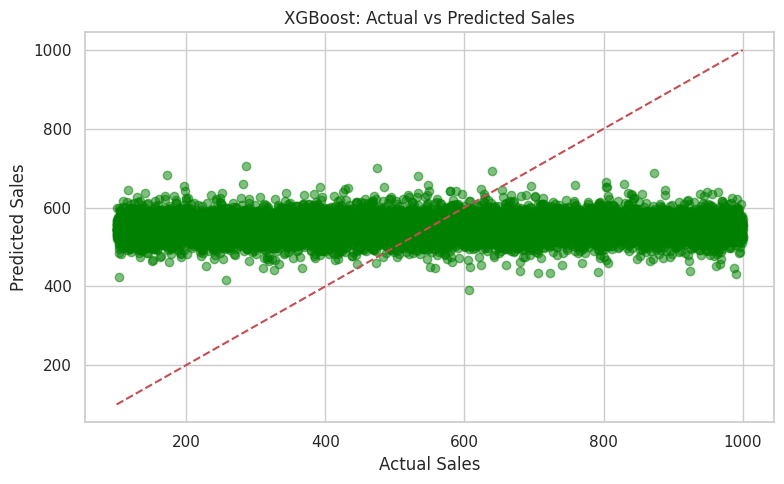

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("XGBoost: Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
